<a href="https://www.kaggle.com/code/ciscoyslas/ciscoprojectnotebook?scriptVersionId=150427115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction/Background

_This data set is for craft beers.  It includes over 2400 beers, over 500 breweries, and 15 parameters that describe the beer in general. Including, but not limited to, ABV (Alcohol by Volume), beer styles (i.e., lager, pale ale, etc.), and IBU (international bitterness units). This data will be used to predict what the ABV of the beers are in the data set.  The problem we will be solving is a multi-class classification problem. The model that I am most interested in using to solve this issue is a Random Forest Classifier. Through a Random Forest we can create multiple decision trees to get more accurate and stable predictions._  

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(color_codes=True, style='white')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craft-cans/breweries.csv
/kaggle/input/craft-cans/beers.csv


## 2. Exploratory Data Analysis

_We are going to start our exploratory analysis into the data by looking at the shape of the data sets that we are working with._


In [2]:
beers_df = pd.read_csv('/kaggle/input/craft-cans/beers.csv')
breweries_df= pd.read_csv('/kaggle/input/craft-cans/breweries.csv')

In [3]:
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
breweries_df.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [5]:
beers_df.shape

(2410, 8)

In [6]:
breweries_df.shape

(558, 4)

In [7]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


_Next we will move into graphs that show what is going on in the data._

_The first 3 graphs explain the relationship between abv and ounces of beer within the data._

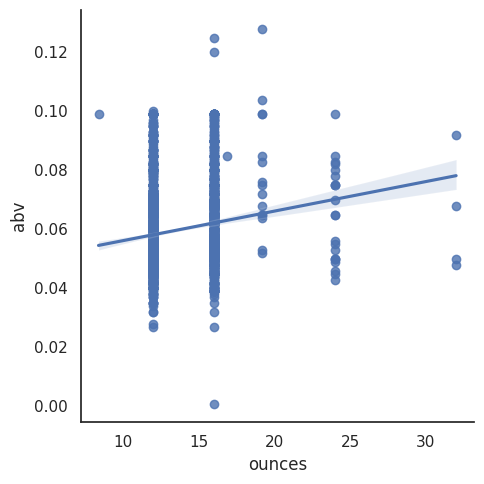

In [8]:
sn.lmplot(x='ounces',y='abv',data=beers_df)

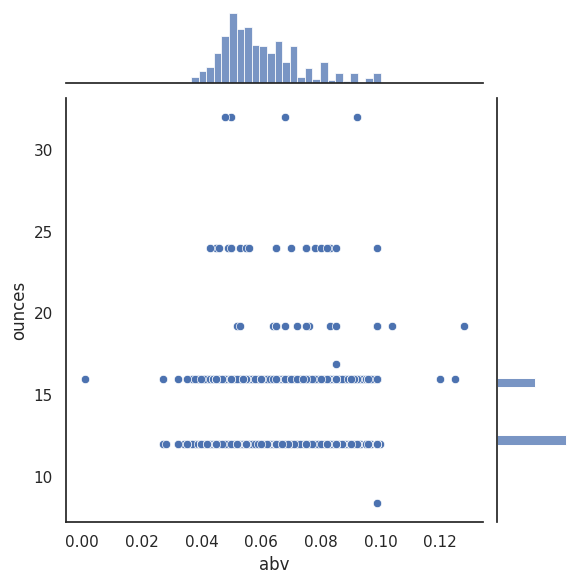

In [9]:
sn.jointplot(x='abv', y='ounces', data=beers_df)

<Axes: xlabel='ounces', ylabel='abv'>

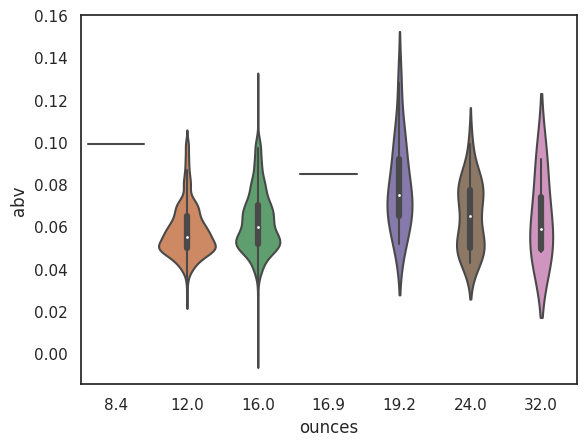

In [10]:
sn.violinplot(x='ounces',y='abv', data=beers_df, size=10)

_Next we are exploring the ounceage of all the beers in the data set. Unsurprisingly, most beers are either 12 oz or 16 oz._

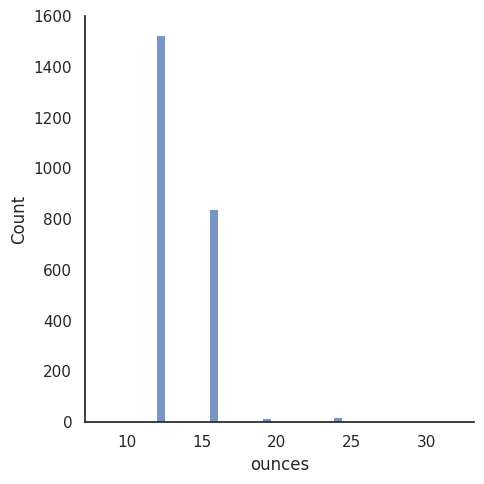

In [11]:
sn.displot(beers_df.ounces)

_This graph contains the number of beers with each abv value given in the set. It looks like most beers fall under the 5-6% abv range._

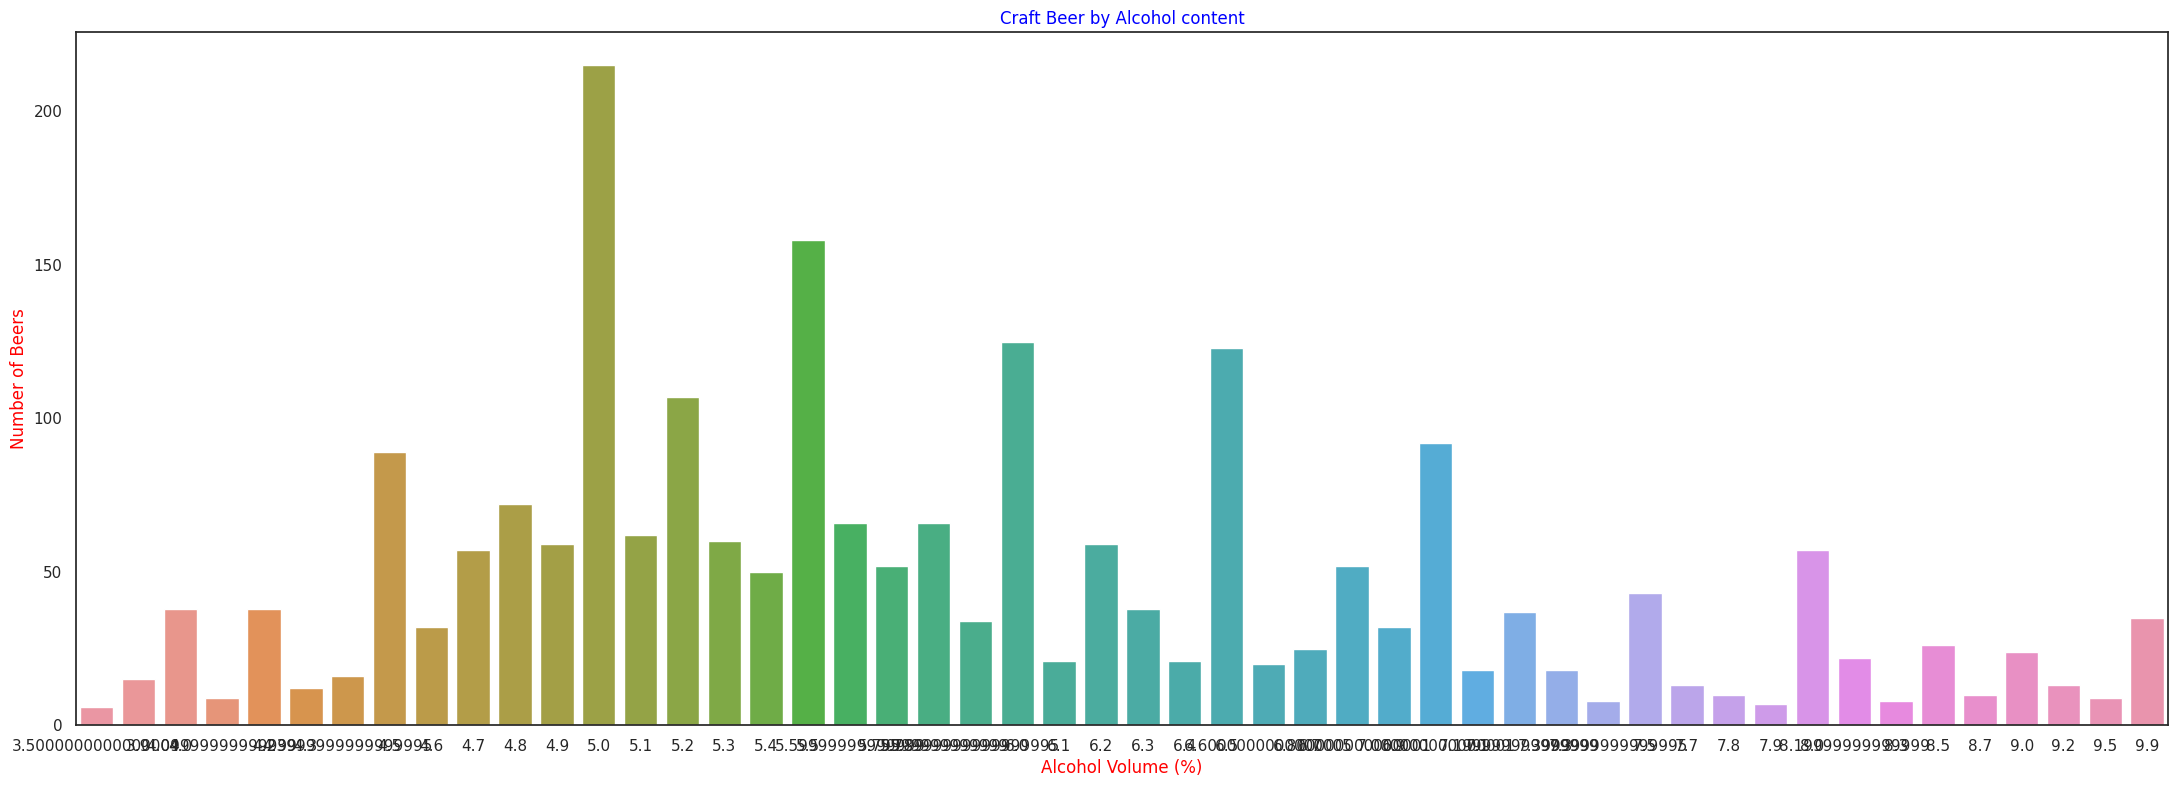

In [12]:
temp = beers_df.groupby('abv')["name"].count().sort_values(ascending=False).head(50)

x = temp.index.astype(float) * 100

y = temp.values

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 27
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

sn.barplot(x=x, y=y)

plt.xlabel("Alcohol Volume (%)", color='red')
plt.ylabel("Number of Beers", color='red')
plt.title("Craft Beer by Alcohol content", color='blue')
plt.show()

_This next graph shows how styles of beers are distributed within the data set. Anecdotally, this graph shows beer styles that have consistently been popular throughout the last 10 years._

Text(0, 0.5, 'Number of Different Beers')

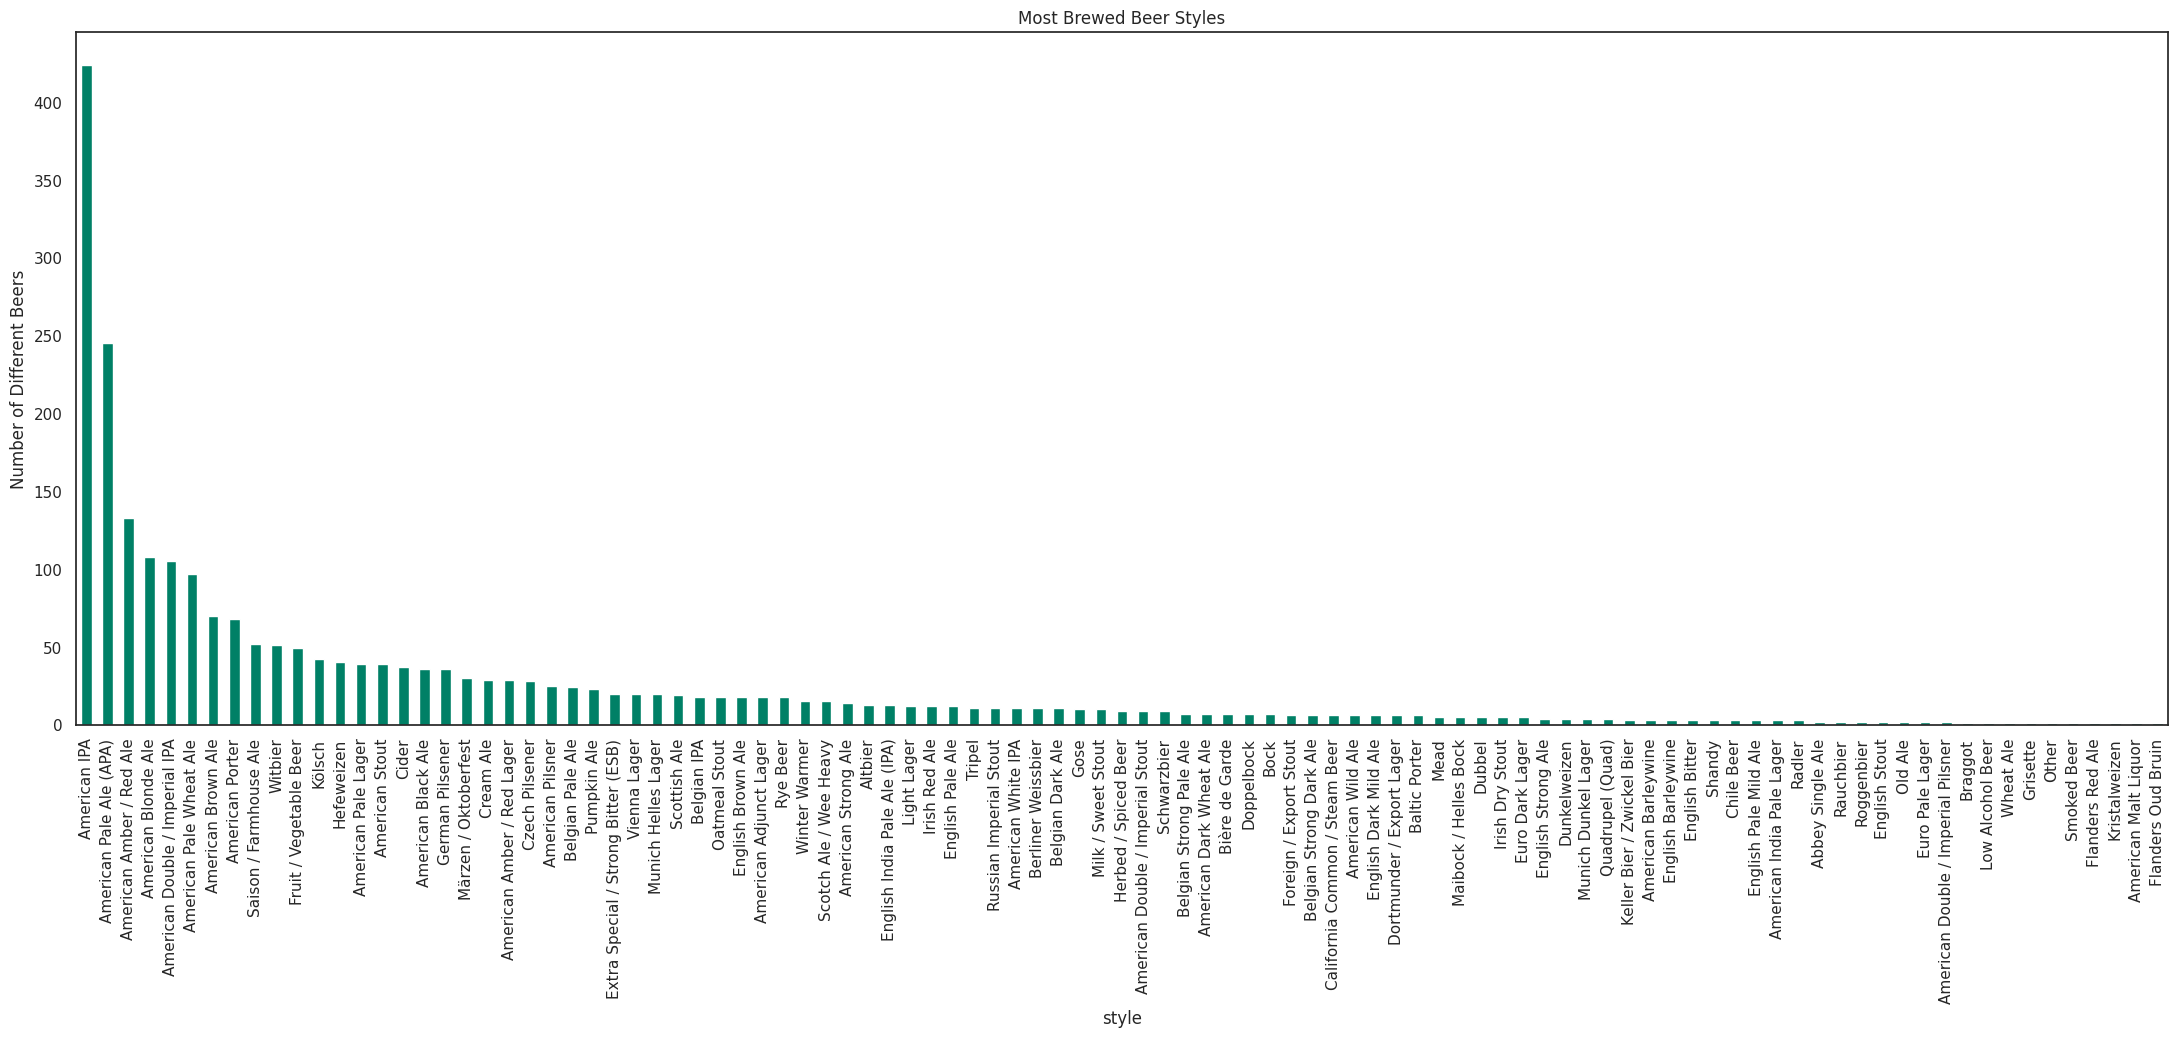

In [13]:
all_styles = beers_df.groupby('style')['name'].count().nlargest(139).plot(kind='bar', \
               title='Most Brewed Beer Styles', \
               colormap='summer',  )

all_styles.set_ylabel('Number of Different Beers')

_Next, I wanted to explore which states had the most breweries in them.  Understanding where the beers come from could be important in determining abv. Places that historically have been brewing beer may have more styles with higher abv._

<Axes: xlabel='count', ylabel='state'>

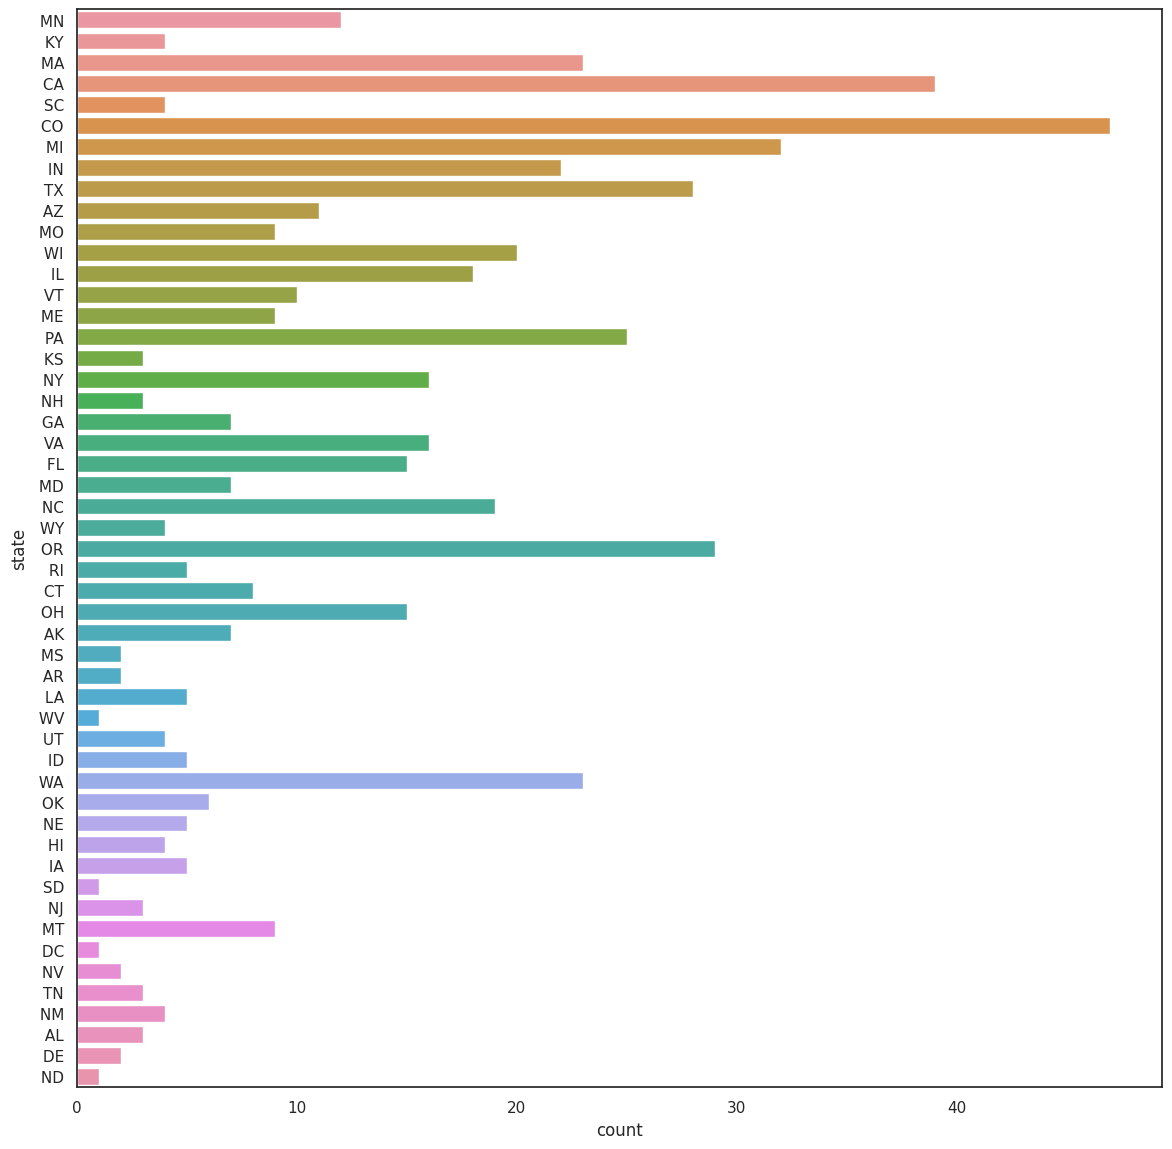

In [14]:
plt.figure(figsize=(14,14))
sn.countplot(data=breweries_df,y='state')

_After we explored state data, it was important to also see which cities contained the most breweries.  Again this could be vital information for our model in the future._

Text(0, 0.5, 'Number of Breweries')

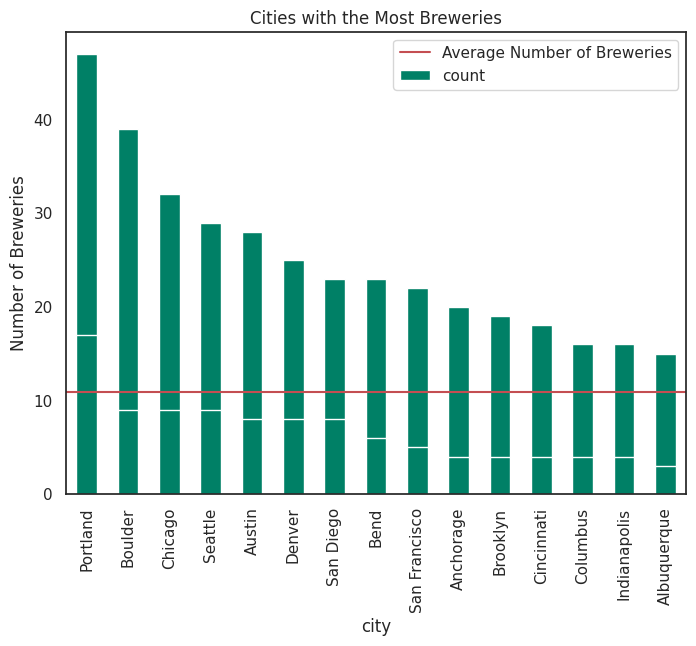

In [15]:
avg_breweries = breweries_df.state.value_counts().plot(kind='bar', title="Number of Breweries in Each State", \
                             figsize=(8,6), colormap='summer')
avg_breweries.set_xlabel('State')
avg_breweries.set_ylabel('Number of Breweries')
mean_line = avg_breweries.axhline(breweries_df.state.value_counts().mean(), color='r',\
                         label='Average Number of Breweries')
plt.legend()

most_breweries = breweries_df.groupby('city')['name'].count().nlargest(15).plot(kind='bar', \
               title='Cities with the Most Breweries', \
               colormap='summer',  )
most_breweries.set_ylabel('Number of Breweries')